In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

data = pd.read_csv("bottle.csv")

data.head()

/var/folders/8t/_x4qcscx7txf2l7h7tx1jwgr0000gn/T/ipykernel_49324/1760372572.py:8: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("bottle.csv")


,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 74 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Cst_Cnt              864863 non-null  int64  
 1   Btl_Cnt              864863 non-null  int64  
 2   Sta_ID               864863 non-null  object 
 3   Depth_ID             864863 non-null  object 
 4   Depthm               864863 non-null  int64  
 5   T_degC               853900 non-null  float64
 6   Salnty               817509 non-null  float64
 7   O2ml_L               696201 non-null  float64
 8   STheta               812174 non-null  float64
 9   O2Sat                661274 non-null  float64
 10  Oxy_µmol/Kg          661268 non-null  float64
 11  BtlNum               118667 non-null  float64
 12  RecInd               864863 non-null  int64  
 13  T_prec               853900 non-null  float64
 14  T_qual               23127 non-null   float64
 15  S_prec           

In [3]:
linear_data = data[['Depthm', 'T_degC']]
linear_data.columns = ['Depth (m)', 'Temperature (C)']
linear_data.head()

,Depth (m),Temperature (C)
0,0,10.50
1,8,10.46
2,10,10.46
3,19,10.45
4,20,10.45


In [4]:
from sklearn.impute import SimpleImputer

my_imputer = SimpleImputer(strategy='median')
linear_data = my_imputer.fit_transform(linear_data)
X = linear_data[:,0].reshape(-1,1)
y = linear_data[:,1]


In [5]:
##Splitting intro training and test data
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, test_size=0.2, random_state=0 )

In [6]:
regr = linear_model.LinearRegression()

In [7]:
regr.fit(X_train, y_train)

LinearRegression()

In [8]:
y_pred = regr.predict(X_test)

In [9]:
print("Coefficients: \n", regr.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Coefficient of of determination: %.2f" % r2_score(y_test, y_pred))

Coefficients: 
 [-0.0090308]
Mean squared error: 9.63
Coefficient of of determination: 0.46


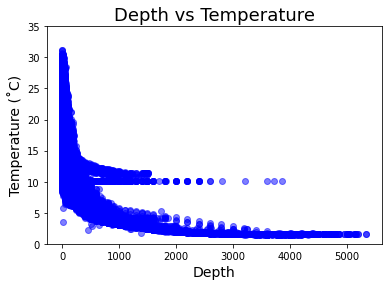

In [10]:
# plt.scatter(X_test, y_test, color="black", alpha=0.7)
plt.scatter(linear_data[:,0], linear_data[:,1], color='blue', alpha=0.5)
# plt.plot(X_test, y_pred, color='#26547C', alpha=0.7, linewidth=2)
plt.ylim([0,35])

plt.title('Depth vs Temperature', fontsize=18)
plt.xlabel('Depth', fontsize=14)
plt.ylabel('Temperature (˚C)', fontsize=14)

plt.show()